In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


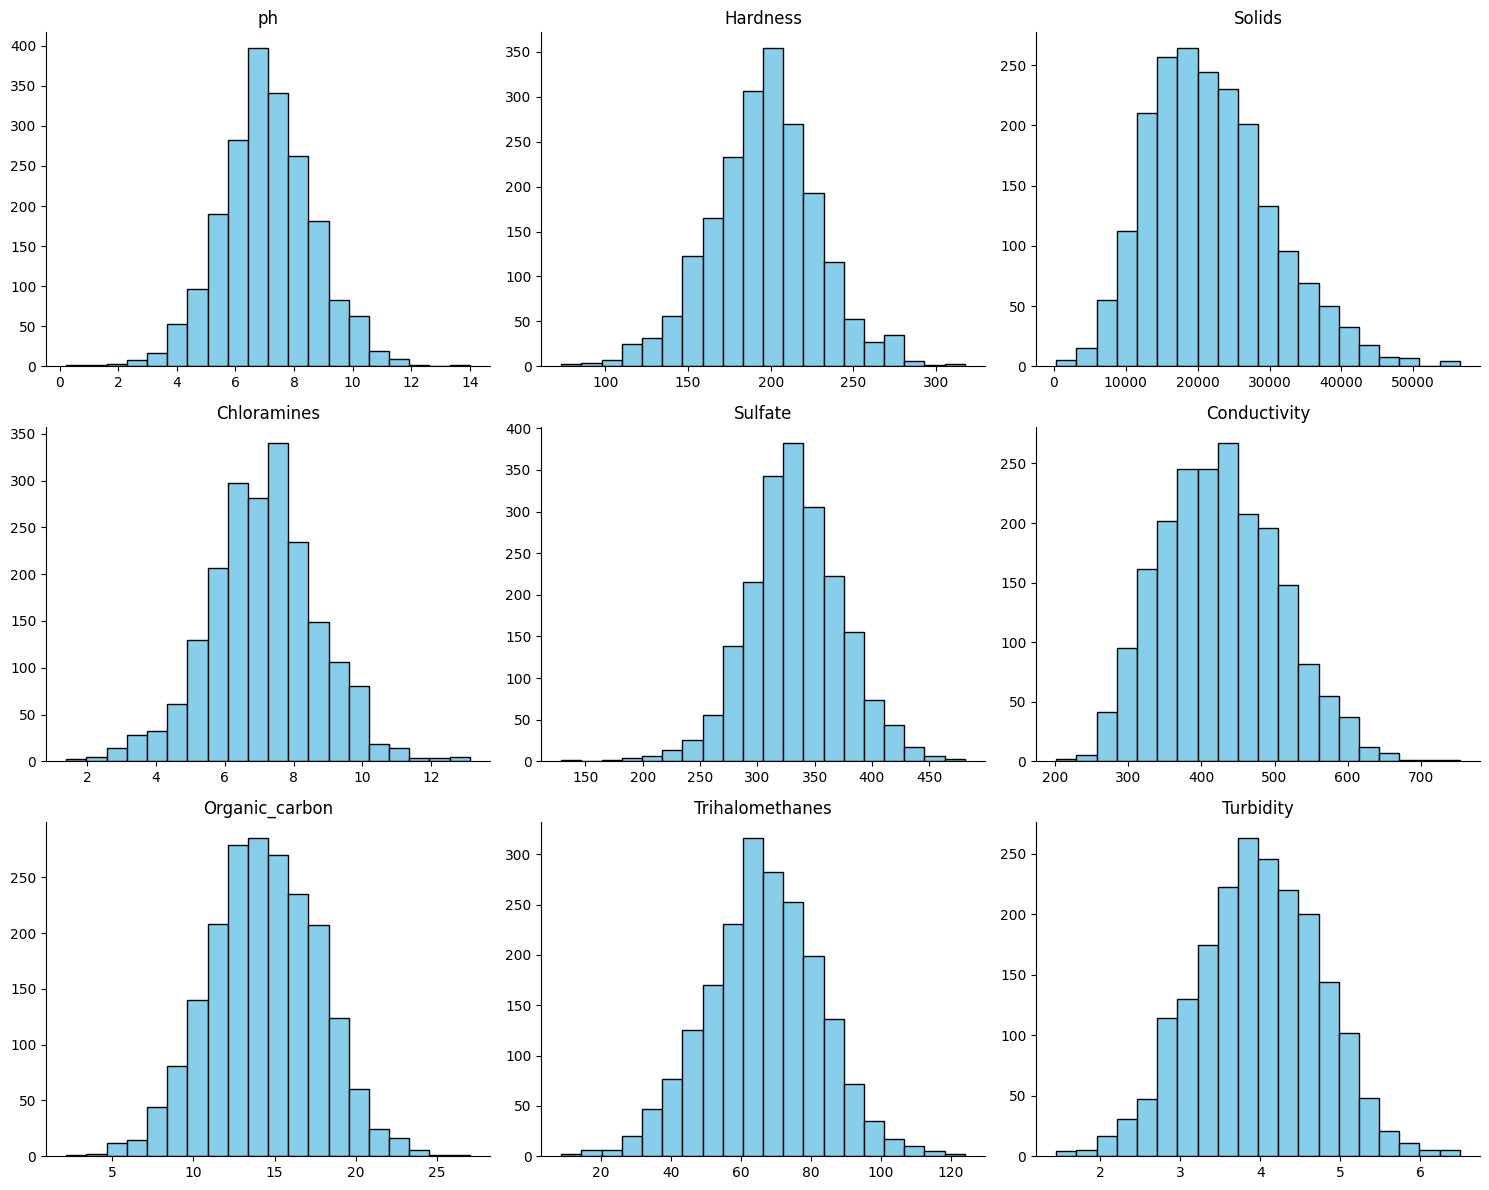

In [7]:
columns_to_plot = df.columns[:-1]
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].spines[['top', 'right']].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


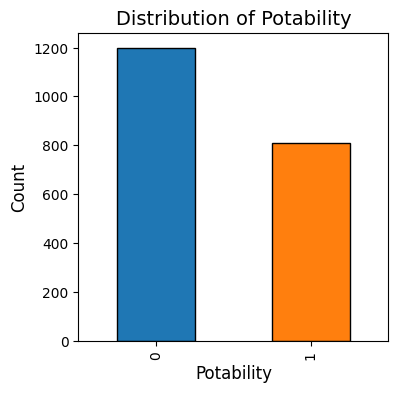

In [8]:
plt.figure(figsize=(4,4))
df['Potability'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.xlabel('Potability', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Potability', fontsize=14)
plt.show()


In [9]:
correlation_matrix = df.corr()
potability_correlation = correlation_matrix['Potability'].drop('Potability')
print(potability_correlation)

ph                 0.014530
Hardness          -0.001505
Solids             0.040674
Chloramines        0.020784
Sulfate           -0.015303
Conductivity      -0.015496
Organic_carbon    -0.015567
Trihalomethanes    0.009244
Turbidity          0.022682
Name: Potability, dtype: float64


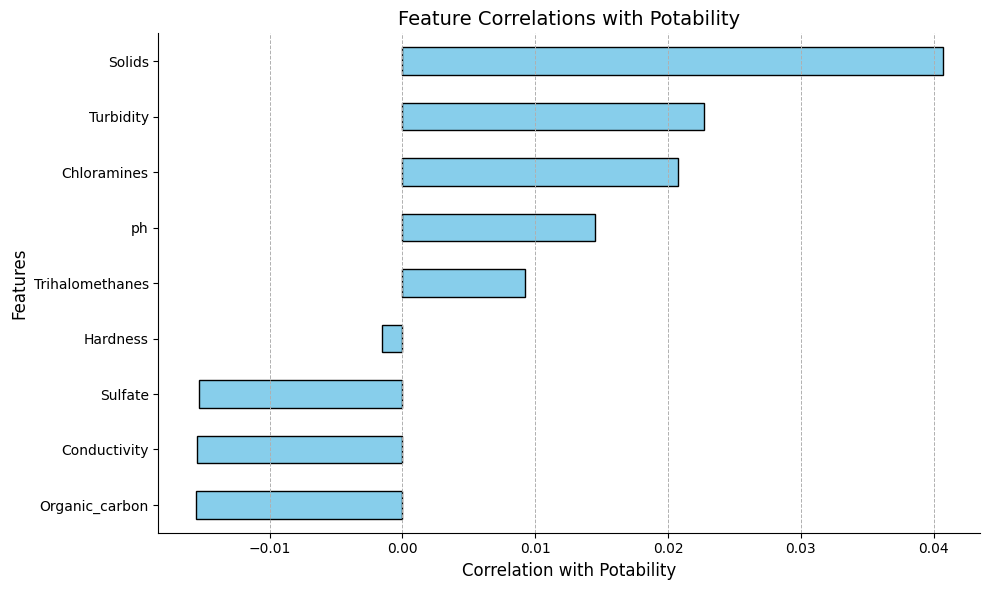

In [10]:
plt.figure(figsize=(10, 6))
potability_correlation.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Correlation with Potability', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlations with Potability', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X = df.drop(columns=['Potability','Hardness','Trihalomethanes'], axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = {
            'Accuracy': accuracy,
            'Classification Report': classification_report(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }
    return results

In [15]:
results = evaluate_models(models, X_train, y_train, X_test, y_test)
accuracies = {}
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("-"*60 )
    accuracies[model_name] = metrics['Accuracy']


Model: Logistic Regression
Accuracy: 0.5707
------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.6129
------------------------------------------------------------
Model: Random Forest
Accuracy: 0.6725
------------------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.6898
------------------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.6352
------------------------------------------------------------


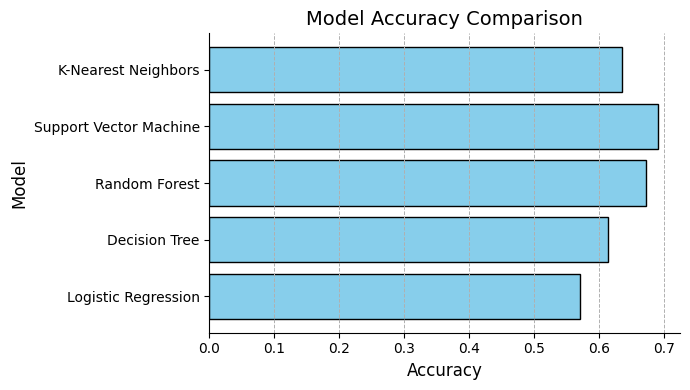

In [16]:
plt.figure(figsize=(7,4))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue', edgecolor='black')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

Therefore, the best model is SVC